In [1]:
import pkg_resources
pkg_resources.require("scikit-learn==0.24.2")
import sklearn
import nltk
import pandas as pd
from sklearn.cluster import KMeans
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import word_tokenize
from nltk.probability import FreqDist
from nltk.corpus import stopwords
import matplotlib.pyplot as plt, mpld3
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
import os
import re
from mpl_toolkits.mplot3d import Axes3D
from nltk.corpus import stopwords
from wordcloud import WordCloud, STOPWORDS
import spacy
import emoji
import requests  ## for getting data from a server

import graphviz

from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.cluster import KMeans

from sklearn import preprocessing

from sklearn.metrics.pairwise import euclidean_distances
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.manifold import MDS
from mpl_toolkits.mplot3d import Axes3D
from scipy.cluster.hierarchy import ward, dendrogram

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

import pyLDAvis.sklearn as LDAvis
import pyLDAvis

from sklearn.decomposition import NMF, LatentDirichletAllocation, TruncatedSVD

In [2]:
nltk.download('words')
words = set(nltk.corpus.words.words())

[nltk_data] Downloading package words to
[nltk_data]     /Users/xingyuchen0810/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [15]:
filename="data/tiktok_google_play_reviews.csv"
smalldata=pd.read_csv(filename)

/var/folders/bc/gl9qhrv56218sxxhq89h4xym0000gq/T/ipykernel_6173/3219340279.py:2: DtypeWarning: Columns (8,9) have mixed types. Specify dtype option on import or set low_memory=False.
  smalldata=pd.read_csv(filename)


In [16]:
df = smalldata[['content', 'score']]
df.describe()

,score
count,460287.000000
mean,4.234919
std,1.430718
min,1.000000
25%,4.000000
50%,5.000000
75%,5.000000
max,5.000000


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460287 entries, 0 to 460286
Data columns (total 2 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   content  460271 non-null  object
 1   score    460287 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 7.0+ MB


In [18]:
df = df[df['content'].notnull()]

In [19]:
nlp = spacy.load("en_core_web_sm")
# lower case
df['new_content'] = df['content'].apply(lambda x: " ".join(x.lower() for x in x.split()))
df.head(20)

,content,score,new_content
0,No words,5,no words
1,Great fun app so far!,5,great fun app so far!
2,The app would get a higher rating but I litera...,1,the app would get a higher rating but i litera...
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,i wish i could give this a 100 percent rating ...
4,Pictures and record,5,pictures and record
5,I love this amazing app,5,i love this amazing app
6,Mohammed Rehan,5,mohammed rehan
7,Love being on Tik Tok.,5,love being on tik tok.
8,Kwai pelo menos da dinheiro,1,kwai pelo menos da dinheiro
9,Post to view is such a step backwards for the ...,1,post to view is such a step backwards for the ...


In [20]:
# remove punctuation
df['new_content'] = df['new_content'].str.replace('[^\w\s]','')
df.head(20)

/var/folders/bc/gl9qhrv56218sxxhq89h4xym0000gq/T/ipykernel_6173/3695246523.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['new_content'] = df['new_content'].str.replace('[^\w\s]','')


,content,score,new_content
0,No words,5,no words
1,Great fun app so far!,5,great fun app so far
2,The app would get a higher rating but I litera...,1,the app would get a higher rating but i litera...
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,i wish i could give this a 100 percent rating ...
4,Pictures and record,5,pictures and record
5,I love this amazing app,5,i love this amazing app
6,Mohammed Rehan,5,mohammed rehan
7,Love being on Tik Tok.,5,love being on tik tok
8,Kwai pelo menos da dinheiro,1,kwai pelo menos da dinheiro
9,Post to view is such a step backwards for the ...,1,post to view is such a step backwards for the ...


In [21]:
# remove numerical values
df['new_content'] = df['new_content'].apply(lambda x: " ".join(x for x in x.split() if x.isalpha()))
df.head(20)

,content,score,new_content
0,No words,5,no words
1,Great fun app so far!,5,great fun app so far
2,The app would get a higher rating but I litera...,1,the app would get a higher rating but i litera...
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,i wish i could give this a percent rating i lo...
4,Pictures and record,5,pictures and record
5,I love this amazing app,5,i love this amazing app
6,Mohammed Rehan,5,mohammed rehan
7,Love being on Tik Tok.,5,love being on tik tok
8,Kwai pelo menos da dinheiro,1,kwai pelo menos da dinheiro
9,Post to view is such a step backwards for the ...,1,post to view is such a step backwards for the ...


In [22]:
# remove stopwords
stop = stopwords.words('english')
df['new_content'] = df['new_content'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
df.head(20)

,content,score,new_content
0,No words,5,words
1,Great fun app so far!,5,great fun app far
2,The app would get a higher rating but I litera...,1,app would get higher rating literally cant sig...
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,wish could give percent rating love
4,Pictures and record,5,pictures record
5,I love this amazing app,5,love amazing app
6,Mohammed Rehan,5,mohammed rehan
7,Love being on Tik Tok.,5,love tik tok
8,Kwai pelo menos da dinheiro,1,kwai pelo menos da dinheiro
9,Post to view is such a step backwards for the ...,1,post view step backwards platform punish casua...


In [23]:
# remove non-english words
df = df[df['new_content'].map(lambda x: x.isascii())]

In [24]:
# lemmatization using Spacy
from tqdm import tqdm
tqdm.pandas()
def space(comment):
    doc = nlp(comment)
    return " ".join([token.lemma_ for token in doc])
df['new_content'] = df['new_content'].progress_apply(space)
df.head(20)

100%|██████████| 445789/445789 [18:34<00:00, 399.99it/s]


,content,score,new_content
0,No words,5,word
1,Great fun app so far!,5,great fun app far
2,The app would get a higher rating but I litera...,1,app would get high rating literally can not si...
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,wish could give percent rating love
4,Pictures and record,5,picture record
5,I love this amazing app,5,love amazing app
6,Mohammed Rehan,5,mohamme rehan
7,Love being on Tik Tok.,5,love tik tok
8,Kwai pelo menos da dinheiro,1,kwai pelo menos da dinheiro
9,Post to view is such a step backwards for the ...,1,post view step backwards platform punish casua...


In [3]:
df.to_csv('data/new_tiktok_google_play_reviews.csv',index=False)

NameError: name 'df' is not defined

In [102]:
filename="data/new_tiktok_google_play_reviews.csv"

df=pd.read_csv(filename)
df = df[df['new_content'].notnull()]

In [103]:
df

,content,score,new_content
0,No words,5,word
1,Great fun app so far!,5,great fun app far
2,The app would get a higher rating but I litera...,1,app would get high rating literally can not si...
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,wish could give percent rating love
4,Pictures and record,5,picture record
...,...,...,...
445783,I love it,5,love
445785,Very nice,1,nice
445786,Nice,5,nice
445787,TikTok love your sad,5,tiktok love sad


In [163]:
new_df = df[df['new_content'].apply(lambda x: len(x) > 3) & df['new_content'].apply(lambda x: len(x) < 50)]

In [164]:
new_df

,content,score,new_content
0,No words,5,word
1,Great fun app so far!,5,great fun app far
3,I WISH I COULD GIVE THIS A 100 PERCENT RATING ...,5,wish could give percent rating love
4,Pictures and record,5,picture record
5,I love this amazing app,5,love amazing app
...,...,...,...
445783,I love it,5,love
445785,Very nice,1,nice
445786,Nice,5,nice
445787,TikTok love your sad,5,tiktok love sad


In [165]:

arm_df = new_df['new_content'].str.split(expand=True)
arm_df


,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,word,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,great,fun,app,far,None,None,None,None,None,None,None,None,None,None,None,None,None
3,wish,could,give,percent,rating,love,None,None,None,None,None,None,None,None,None,None,None
4,picture,record,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
5,love,amazing,app,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445783,love,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
445785,nice,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
445786,nice,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
445787,tiktok,love,sad,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [166]:
arm_df = arm_df.reset_index(drop=True)
# arm_df = arm_df.drop(['index'], axis = 1)
arm_df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,word,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
1,great,fun,app,far,None,None,None,None,None,None,None,None,None,None,None,None,None
2,wish,could,give,percent,rating,love,None,None,None,None,None,None,None,None,None,None,None
3,picture,record,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
4,love,amazing,app,None,None,None,None,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354154,love,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
354155,nice,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
354156,nice,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None
354157,tiktok,love,sad,None,None,None,None,None,None,None,None,None,None,None,None,None,None


In [167]:

arm_df.to_csv('data/new_arm_for_r.csv')

In [42]:
HeadlineLIST= new_df['new_content']
LabelLIST=new_df['score']

In [73]:
### Vectorize
MyCountV=CountVectorizer(
    input="content",
    lowercase=True,
    stop_words = "english"
)

MyDTM = MyCountV.fit_transform(HeadlineLIST)  # create a sparse matrix
print(type(MyDTM))
#vocab is a vocabulary list
vocab = MyCountV.get_feature_names()  # change to a list
print(list(vocab)[10:20])


MyDTM = MyDTM.toarray()  # convert to a regular array
print(type(MyDTM))

ColumnNames=MyCountV.get_feature_names()
MyDTM_DF=pd.DataFrame(MyDTM,columns=ColumnNames)
print(MyDTM_DF)

num_topics = 7

lda_model_DH = LatentDirichletAllocation(n_components=num_topics,
                                         max_iter=20, learning_method='online', verbose=True)
LDA_DH_Model = lda_model_DH.fit_transform(MyDTM_DF)

word_topic = np.array(lda_model_DH.components_)
word_topic = word_topic.transpose()

num_top_words = 15
vocab_array = np.asarray(vocab)
fontsize_base = 13

<class 'scipy.sparse._csr.csr_matrix'>
['aaalaaa', 'aaap', 'aaasif', 'aaassss', 'aaaxxvi', 'aahahha', 'aai', 'aais', 'aajaja', 'aala']
<class 'numpy.ndarray'>
        aa  aaa  aaaa  aaaaa  aaaaaaaa  aaaaaye  aaaah  aaaala  aaaamm  aaaha  \
0        0    0     0      0         0        0      0       0       0      0   
1        0    0     0      0         0        0      0       0       0      0   
2        0    0     0      0         0        0      0       0       0      0   
3        0    0     0      0         0        0      0       0       0      0   
4        0    0     0      0         0        0      0       0       0      0   
...     ..  ...   ...    ...       ...      ...    ...     ...     ...    ...   
176008   0    0     0      0         0        0      0       0       0      0   
176009   0    0     0      0         0        0      0       0       0      0   
176010   0    0     0      0         0        0      0       0       0      0   
176011   0    0     0      0   

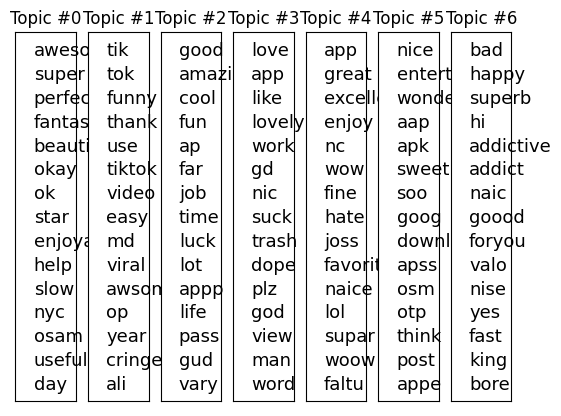

In [74]:
# LDA1
fig = plt.figure()
for t in range(num_topics):

    plt.subplot(1, num_topics, t + 1)  # plot numbering starts with 1
    plt.ylim(0, num_top_words + 0.5)  # stretch the y-axis to accommodate the words
    plt.xticks([])  # remove x-axis markings ('ticks')
    plt.yticks([]) # remove y-axis markings ('ticks')
    plt.title('Topic #{}'.format(t))
    top_words_idx = np.argsort(word_topic[:,t])[::-1]  # descending order
    top_words_idx = top_words_idx[:num_top_words]
    top_words = vocab_array[top_words_idx]
    top_words_shares = word_topic[top_words_idx, t]
    for i, (word, share) in enumerate(zip(top_words, top_words_shares)):
        plt.text(0.3, num_top_words-i-0.5, word, fontsize=fontsize_base)
        ##fontsize_base*share)

mpld3.save_html(fig,'lda1.html')

In [75]:
# LDA2
pyLDAvis.enable_notebook() ## not using notebook

dtm = np.matrix(MyDTM)
panel = LDAvis.prepare(lda_model_DH, dtm, MyCountV, mds='tsne')

pyLDAvis.save_html(panel, "lda2.html")

/opt/homebrew/lib/python3.10/site-packages/pyLDAvis/_prepare.py:244: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  by='saliency', ascending=False).head(R).drop('saliency', 1)
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/multiclass.py:14: DeprecationWarning: Please use `spmatrix` from the `scipy.sparse` namespace, the `scipy.sparse.base` namespace is deprecated.
  from scipy.sparse.base import spmatrix
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/multiclass.py:14: DeprecationWarning: Please use `spmatrix` from the `scipy.sparse` namespace, the `scipy.sparse.base` namespace is deprecated.
  from scipy.sparse.base import spmatrix
/opt/homebrew/lib/python3.10/site-packages/sklearn/utils/multiclass.py:14: DeprecationWarning: Please use `spmatrix` from the `scipy.sparse` namespace, the `scipy.sparse.base` namespace is deprecated.
  from scipy.sparse.base import spmatrix
/opt/homebr

In [43]:
### Vectorize
MyCountV=CountVectorizer(
    input="content",
    lowercase=True,
    stop_words = "english",
    max_features=100
)

MyDTM = MyCountV.fit_transform(HeadlineLIST)  # create a sparse matrix
ColumnNames=MyCountV.get_feature_names()
DF_Count=pd.DataFrame(MyDTM.toarray(),columns=ColumnNames)

In [44]:
new_df.loc[new_df['score'] == 5, 'score'] = 'very good'
new_df.loc[new_df['score'] == 4, 'score'] = 'good'
new_df.loc[new_df['score'] == 3, 'score'] = 'average'
new_df.loc[new_df['score'] == 2, 'score'] = 'bad'
new_df.loc[new_df['score'] == 1, 'score'] = 'very bad'

In [45]:
new_df = new_df.reset_index()

In [46]:
DF_Count=DF_Count.rename(new_df['score'], axis="index")
print(DF_Count) 

           aap  addict  addictive  ali  amazing  ap  apk  apo  app  appp  ...  \
very good    0       0          0    0        0   0    0    0    0     0  ...   
very good    0       0          0    0        0   0    0    0    0     0  ...   
very good    0       0          0    0        0   0    0    0    0     0  ...   
very good    0       0          0    0        0   0    0    0    0     0  ...   
very good    0       0          0    0        0   0    0    0    0     0  ...   
...        ...     ...        ...  ...      ...  ..  ...  ...  ...   ...  ...   
very good    0       0          0    0        0   0    0    0    0     0  ...   
very good    0       0          0    0        0   0    0    0    0     0  ...   
very bad     0       0          0    0        0   0    0    0    0     0  ...   
very good    0       0          0    0        0   0    0    0    0     0  ...   
very good    0       0          0    0        0   0    0    0    0     0  ...   

           valo  video  vie

In [60]:
DF_Count.to_csv('data/df_count.csv')

In [168]:
filename="data/df_count.csv"

df=pd.read_csv(filename)

In [169]:
df

,Unnamed: 0,aap,addict,addictive,ali,amazing,ap,apk,apo,app,...,valo,video,view,viral,watch,wonderful,work,wow,year,yes
0,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176008,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176009,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176010,very bad,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176011,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [170]:
df = df.rename(columns={ df.columns[0]: "LABEL" })
df

,LABEL,aap,addict,addictive,ali,amazing,ap,apk,apo,app,...,valo,video,view,viral,watch,wonderful,work,wow,year,yes
0,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176008,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176009,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176010,very bad,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176011,very good,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [171]:
df_tem = df
df_tem = df_tem.drop(['LABEL'], axis = 1)
df_tem

,aap,addict,addictive,ali,amazing,ap,apk,apo,app,appp,...,valo,video,view,viral,watch,wonderful,work,wow,year,yes
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176009,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [176]:
df_tem.drop([col for col, val in df_tem.sum().iteritems() if val < 500], axis=1, inplace=True)

/var/folders/bc/gl9qhrv56218sxxhq89h4xym0000gq/T/ipykernel_11272/2670894102.py:1: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  df_tem.drop([col for col, val in df_tem.sum().iteritems() if val < 500], axis=1, inplace=True)


In [177]:
df_tem

,amazing,app,awesome,bad,cool,enjoy,entertain,excellent,fantastic,fun,...,like,love,lovely,nice,perfect,super,thank,tik,tok,wonderful
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
176009,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
176010,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
176011,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [178]:
df_tem['LABEL'] = df['LABEL']
df_tem

,amazing,app,awesome,bad,cool,enjoy,entertain,excellent,fantastic,fun,...,love,lovely,nice,perfect,super,thank,tik,tok,wonderful,LABEL
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,very good
1,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,very good
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,very good
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,very good
4,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,very good
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
176008,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,very good
176009,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,very good
176010,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,very bad
176011,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,very good


In [188]:
df_tem = df_tem.sample(n=50)

In [189]:
df_tem

,amazing,app,awesome,bad,cool,enjoy,entertain,excellent,fantastic,fun,...,love,lovely,nice,perfect,super,thank,tik,tok,wonderful,LABEL
43409,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,very good
169495,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,very good
164611,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,very good
159282,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,very good
84236,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,very good
42560,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,very good
153593,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,very good
37016,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,very bad
67900,0,1,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,very good
159741,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,very good


In [190]:
df_tem.to_csv('data/new_cluster_for_r.csv',index=False)

In [18]:
import sklearn.metrics as metrics
Sih=[]
Cal=[]
k_range=range(2,8)

for k in k_range:
    k_means_n = KMeans(n_clusters=k)
    model = k_means_n.fit(DF_Count)
    Pred = k_means_n.predict(DF_Count)
    labels_n = k_means_n.labels_
    R1=metrics.silhouette_score(DF_Count, labels_n, metric = 'euclidean')
    R2=metrics.calinski_harabasz_score(DF_Count, labels_n)
    Sih.append(R1)
    Cal.append(R2)

print(Sih) ## higher is better
print(Cal) ## higher is better

fig1, (ax1, ax2) = plt.subplots(nrows=2, ncols=1)
ax1.plot(k_range,Sih)
ax1.set_title("Silhouette")
ax1.set_xlabel("")
ax2.plot(k_range,Cal)
ax2.set_title("Calinski_Harabasz_Score")
ax2.set_xlabel("k values")

NameError: name 'metrics' is not defined

In [ ]:
My_KMean3= KMeans(n_clusters=3)
My_KMean3.fit(DF_Count)
My_labels3=My_KMean3.predict(DF_Count)
print("Silhouette Score for k = 3 \n",silhouette_score(DF_Count, My_labels3))



KeyboardInterrupt: 

Exception ignored in: 'sklearn.cluster._k_means_fast._relocate_empty_clusters_dense'
Traceback (most recent call last):
  File "<__array_function__ internals>", line 180, in where
  File "/opt/homebrew/lib/python3.10/site-packages/numpy/core/multiarray.py", line 345, in where
    @array_function_from_c_func_and_dispatcher(_multiarray_umath.where)
KeyboardInterrupt: 


In [ ]:
My_KMean4= KMeans(n_clusters=4)
My_KMean4.fit(DF_Count)
My_labels4=My_KMean4.predict(DF_Count)
print("Silhouette Score for k = 4 \n",silhouette_score(DF_Count, My_labels4))



In [ ]:
My_KMean5= KMeans(n_clusters=5)
My_KMean5.fit(DF_Count)
My_labels5=My_KMean5.predict(DF_Count)
print("Silhouette Score for k = 5 \n",silhouette_score(DF_Count, My_labels5))

